# Interest rate simulation using HULL WHITE model

## In this notebook, we will perform simulation of short-rate process using HULL WHITE model offered in QuantLib

In [1]:
from QuantLib import *
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

First, we need to look at the mathematics behind the HULL-WHITE model



In [49]:
sigma = 0.1
a = 0.1
timestep = 360
length = 30
forward_rate = 0.05
day_count = Thirty360()
todays_date = Date(15,1,2015)

In [7]:
Settings.instance().evaluationDate = todays_date
spot_curve = FlatForward(todays_date, QuoteHandle(SimpleQuote(forward_rate)), day_count)
spot_curve_handle = YieldTermStructureHandle(spot_curve)

In [8]:
hw_process = HullWhiteProcess(spot_curve_handle, a, sigma)
rng = GaussianRandomSequenceGenerator(UniformRandomSequenceGenerator(timestep, UniformRandomGenerator()))
seq = GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [9]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

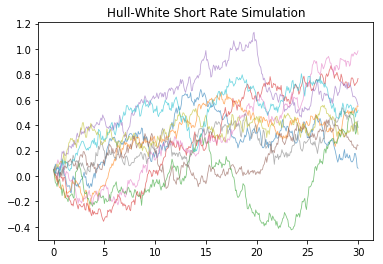

In [12]:
num_paths = 10
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i,:], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

In [50]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)

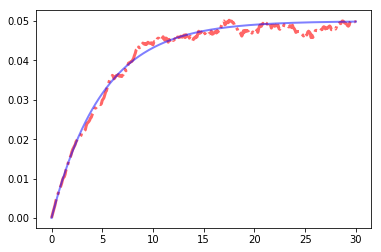

In [51]:
vol = [np.var(paths[:, i]) for i in range(timestep+1)]
plt.plot(time, vol, "r-.", lw=3, alpha=0.6)
plt.plot(time,sigma*sigma/(2*a)*(1.0-np.exp(a*np.array(time)*-2.0)), "b-", lw=2, alpha=0.5)

In [52]:
def alpha(forward, sigma, a, t):
    return forward + 0.5*np.power(sigma/a*(1.0-np.exp(-a*t)), 2)

Text(0.5,1,'Mean of Short Rates')

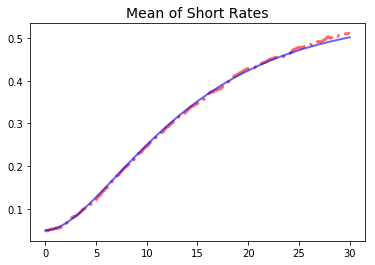

In [53]:
avg = [np.mean(paths[:,i]) for i in range(timestep+1)]
plt.plot(time, avg, "r-.", lw=3, alpha=0.6)
plt.plot(time, alpha(forward_rate, sigma, a, time), "b-", lw=2, alpha=0.6)
plt.title("Mean of Short Rates", size=14)